In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Fungsi K-Medoids
def k_medoids(data, k, max_iter=100):
    m, n = data.shape

    # Langkah 1: Inisialisasi medoid secara acak
    medoids = data[np.random.choice(m, k, replace=False)]

    for _ in range(max_iter):
        # Langkah 2: Menetapkan titik ke medoid terdekat
        clusters = {i: [] for i in range(k)}
        for point in data:
            distances = [euclidean_distance(point, medoid) for medoid in medoids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # Langkah 3: Memperbarui medoid
        new_medoids = []
        for cluster_index, points in clusters.items():
            points = np.array(points)
            medoid_index = np.argmin([np.sum([euclidean_distance(point, other_point) for other_point in points]) for point in points])
            new_medoids.append(points[medoid_index])

        new_medoids = np.array(new_medoids)

        # Memeriksa konvergensi
        if np.all(medoids == new_medoids):
            break

        medoids = new_medoids

    return medoids, clusters

# Contoh penggunaan
# Data kecamatan dengan nama, status keparahan, dan kode kecamatan
data = np.array([
    [15, 3, 2, 1, 4, 2, 1, 0],  # Karang Baru
    [10, 2, 1, 1, 3, 1, 1, 1],  # Tamiang Hulu
    [20, 4, 3, 2, 5, 3, 2, 1],  # Rantau
    [12, 3, 2, 2, 4, 2, 1, 1],  # Seruway
    [8, 2, 1, 1, 2, 1, 1, 0],   # Banda Mulia
    [14, 3, 2, 2, 4, 2, 1, 1],  # Bendahara
    [11, 2, 1, 1, 3, 1, 1, 0],  # Manyak Payed
    [9, 2, 1, 1, 3, 1, 1, 0],   # Tenggulun
    [13, 3, 2, 2, 4, 2, 1, 1],  # Kejuruan Muda
    [7, 2, 1, 1, 2, 1, 1, 0],   # Sekerak
    [10, 2, 1, 1, 3, 1, 1, 0],  # Bandar Pusaka
    [18, 4, 3, 2, 5, 3, 2, 1],  # Kuala Simpang
    [16, 3, 2, 2, 4, 2, 1, 1]   # Kota Kualasimpang
])

kecamatan = [
    "Karang Baru", "Tamiang Hulu", "Rantau", "Seruway", "Banda Mulia",
    "Bendahara", "Manyak Payed", "Tenggulun", "Kejuruan Muda", "Sekerak",
    "Bandar Pusaka", "Kuala Simpang", "Kota Kualasimpang"
]

kode_kecamatan = [
    "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "M13"
]

tingkat_keparahan = [
    "Rendah", "Normal", "Sedang", "Parah"
]

k = 4
medoids, clusters = k_medoids(data, k)

# Buat DataFrame untuk hasil clustering
results = []
for cluster_index, points in clusters.items():
    for point in points:
        idx = np.where((data == point).all(axis=1))[0][0]
        results.append([kode_kecamatan[idx], kecamatan[idx], point.tolist(), tingkat_keparahan[cluster_index]])

df_results = pd.DataFrame(results, columns=["Kode Kecamatan", "Kecamatan", "Nilai Medoids Akhir", "Tingkat Keparahan"])
df_results





,Kode Kecamatan,Kecamatan,Nilai Medoids Akhir,Tingkat Keparahan
0,M3,Rantau,"[20, 4, 3, 2, 5, 3, 2, 1]",Rendah
1,M12,Kuala Simpang,"[18, 4, 3, 2, 5, 3, 2, 1]",Rendah
2,M13,Kota Kualasimpang,"[16, 3, 2, 2, 4, 2, 1, 1]",Rendah
3,M1,Karang Baru,"[15, 3, 2, 1, 4, 2, 1, 0]",Normal
4,M4,Seruway,"[12, 3, 2, 2, 4, 2, 1, 1]",Normal
5,M6,Bendahara,"[14, 3, 2, 2, 4, 2, 1, 1]",Normal
6,M9,Kejuruan Muda,"[13, 3, 2, 2, 4, 2, 1, 1]",Normal
7,M2,Tamiang Hulu,"[10, 2, 1, 1, 3, 1, 1, 1]",Sedang
8,M7,Manyak Payed,"[11, 2, 1, 1, 3, 1, 1, 0]",Sedang
9,M8,Tenggulun,"[9, 2, 1, 1, 3, 1, 1, 0]",Sedang


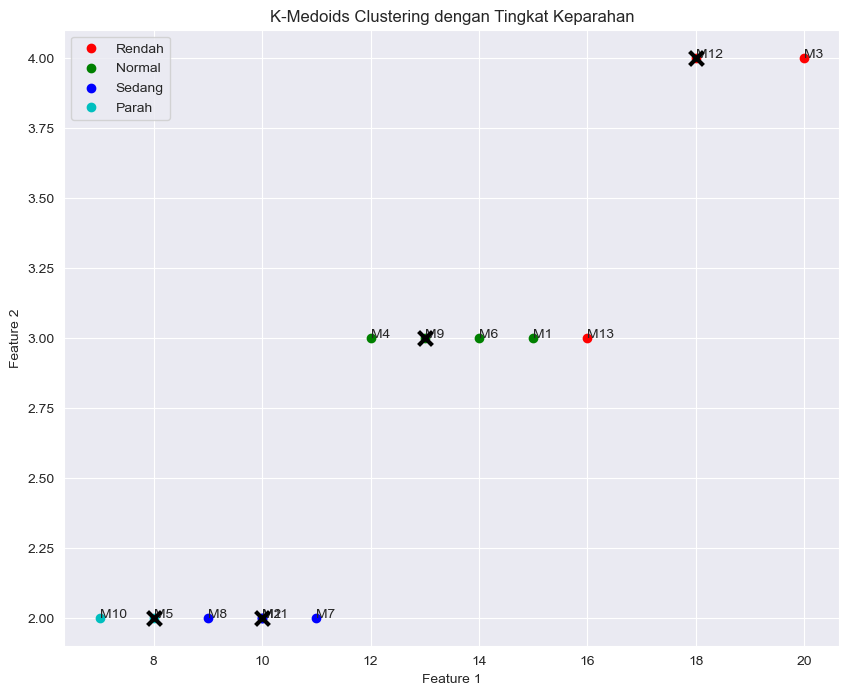

In [26]:
# Visualisasi hasil K-Medoids
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c']

for cluster_index, points in clusters.items():
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], c=colors[cluster_index % len(colors)], label=f'{tingkat_keparahan[cluster_index]}')

# Menampilkan titik medoids
for medoid in medoids:
    plt.scatter(medoid[0], medoid[1], c='k', marker='x', s=100, linewidths=3, zorder=10)

for i, txt in enumerate(kode_kecamatan):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Medoids Clustering dengan Tingkat Keparahan')
plt.grid(True)
plt.show()

In [29]:
import requests
import folium
import urllib.parse
import time
import json

# Data kecamatan dengan nama, status keparahan, dan kode kecamatan
data = [
    {"kecamatan": "Karang Baru", "tingkat_keparahan": "Parah", "kode": "M1"},
    {"kecamatan": "Tamiang Hulu", "tingkat_keparahan": "Normal", "kode": "M2"},
    {"kecamatan": "Rantau", "tingkat_keparahan": "Parah", "kode": "M3"},
    {"kecamatan": "Seruway", "tingkat_keparahan": "Sedang", "kode": "M4"},
    {"kecamatan": "Banda Mulia", "tingkat_keparahan": "Rendah", "kode": "M5"},
    {"kecamatan": "Bendahara", "tingkat_keparahan": "Sedang", "kode": "M6"},
    {"kecamatan": "Manyak Payed", "tingkat_keparahan": "Normal", "kode": "M7"},
    {"kecamatan": "Tenggulun", "tingkat_keparahan": "Rendah", "kode": "M8"},
    {"kecamatan": "Kejuruan Muda", "tingkat_keparahan": "Sedang", "kode": "M9"},
    {"kecamatan": "Sekerak", "tingkat_keparahan": "Rendah", "kode": "M10"},
    {"kecamatan": "Bandar Pusaka", "tingkat_keparahan": "Normal", "kode": "M11"},
    {"kecamatan": "Kuala Simpang", "tingkat_keparahan": "Parah", "kode": "M12"},
    # {"kecamatan": "Kota Kualasimpang", "tingkat_keparahan": "Sedang", "kode": "M13"},
]

# Fungsi untuk mendapatkan data GeoJSON dari nama kecamatan menggunakan API geocode.maps.co
def get_geojson(kecamatan):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    query = urllib.parse.quote(f"{kecamatan}, Aceh, Indonesia")
    url = f"https://geocode.maps.co/search?q={query}&api_key=668e5730382de200115510elq740b74"
    print(url)
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Error: API request failed with status code {response.status_code}")
        return None

    try:
        response_json = response.json()
    except ValueError:
        print("Error: Response is not in JSON format")
        return None

    if response_json:
        return response_json[0]
    else:
        print(f"No results found for {kecamatan}")
        return None

# Mendapatkan data GeoJSON untuk setiap kecamatan
for item in data:
    geojson_data = get_geojson(item["kecamatan"])
    item["geojson"] = geojson_data
    time.sleep(1)  # Menambahkan jeda untuk mematuhi kebijakan API

# Warna untuk setiap tingkat keparahan
warna_keparahan = {
    "Rendah": "green",
    "Normal": "blue",
    "Sedang": "orange",
    "Parah": "red"
}

# Membuat peta
m = folium.Map(location=[4.5833, 97.9333], zoom_start=10)

# Menambahkan titik dan arsiran ke peta setelah semua data GeoJSON didapatkan
for item in data:
    if item["geojson"] is not None:
        lat = float(item["geojson"]["lat"])
        lon = float(item["geojson"]["lon"])
        folium.CircleMarker(
            location=[lat, lon],
            radius=10,
            popup=f'{item["kecamatan"]} ({item["kode"]}) - {item["tingkat_keparahan"]}',
            color=warna_keparahan[item["tingkat_keparahan"]],
            fill=True,
            fill_color=warna_keparahan[item["tingkat_keparahan"]],
        ).add_to(m)

        # Menambahkan nama kecamatan sebagai tooltip
        folium.Marker(
            location=[lat, lon],
            icon=folium.DivIcon(html=f'<div style="font-size: 12pt">{item["kecamatan"]}</div>')
        ).add_to(m)

# Menampilkan peta
m.save("penyebaran_keparahan.html")
m

https://geocode.maps.co/search?q=Karang%20Baru%2C%20Aceh%2C%20Indonesia&api_key=668e5730382de200115510elq740b74
https://geocode.maps.co/search?q=Tamiang%20Hulu%2C%20Aceh%2C%20Indonesia&api_key=668e5730382de200115510elq740b74
https://geocode.maps.co/search?q=Rantau%2C%20Aceh%2C%20Indonesia&api_key=668e5730382de200115510elq740b74
https://geocode.maps.co/search?q=Seruway%2C%20Aceh%2C%20Indonesia&api_key=668e5730382de200115510elq740b74
https://geocode.maps.co/search?q=Banda%20Mulia%2C%20Aceh%2C%20Indonesia&api_key=668e5730382de200115510elq740b74
https://geocode.maps.co/search?q=Bendahara%2C%20Aceh%2C%20Indonesia&api_key=668e5730382de200115510elq740b74
https://geocode.maps.co/search?q=Manyak%20Payed%2C%20Aceh%2C%20Indonesia&api_key=668e5730382de200115510elq740b74
https://geocode.maps.co/search?q=Tenggulun%2C%20Aceh%2C%20Indonesia&api_key=668e5730382de200115510elq740b74
https://geocode.maps.co/search?q=Kejuruan%20Muda%2C%20Aceh%2C%20Indonesia&api_key=668e5730382de200115510elq740b74
https://g